# 06_evaluation_and_optimization.ipynb

**Objectives:**  
1. Load trained models and validation set  
2. Calculate final metrics (MAE, RMSE, R²) on validation  
3. Plot residuals to assess fit  
4. Generate learning curves to check under/over-fitting  
5. If needed, refine hyperparameters or try stacked models  


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import joblib  # to load saved models

# Paths
model_path = "/Users/shreychaudhary/Documents/Samsung_Fold7_Sales_Prediction/models/fold_sales_model.pkl"  # or your chosen final model
data_path  = "/Users/shreychaudhary/Documents/Samsung_Fold7_Sales_Prediction/data/processed/model_data.csv"

# Load data
df = pd.read_csv(data_path)
# Split as before
train = df.dropna(subset=["FirstMonthSales"])
X = train.drop(columns=["Version","LaunchDate","FirstMonthSales"])
y = train["FirstMonthSales"]

In [14]:
# Load your final model
model = joblib.load(model_path)

# If you split earlier, reload your X_val/y_val or re-split here
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Predict
y_pred = model.predict(X_val)

In [16]:
mae  = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2   = r2_score(y_val, y_pred)

print(f"Final Model Performance:")
print(f"  MAE : {mae:.0f} units")
print(f"  RMSE: {rmse:.0f} units")
print(f"  R²  : {r2:.2f}")


Final Model Performance:
  MAE : 100500 units
  RMSE: 100500 units
  R²  : nan


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


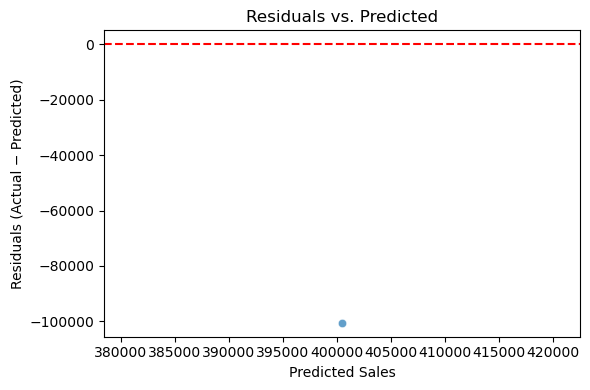

In [18]:
residuals = y_val - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Actual − Predicted)")
plt.title("Residuals vs. Predicted")
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:2050: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 2 instead of 5.
  warnings.warn(


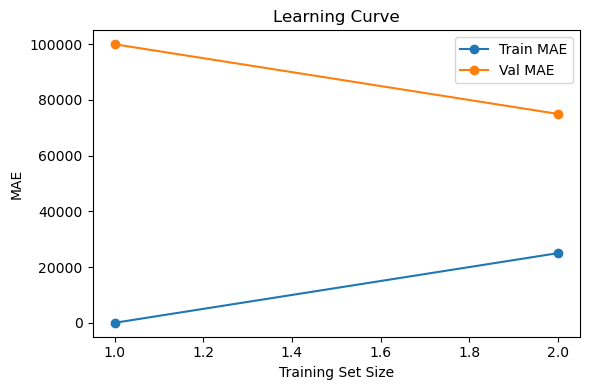

In [22]:
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

# Convert to positive MAE
train_mae = -train_scores
val_mae   = -val_scores

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mae.mean(axis=1), marker="o", label="Train MAE")
plt.plot(train_sizes, val_mae.mean(axis=1), marker="o", label="Val MAE")
plt.xlabel("Training Set Size")
plt.ylabel("MAE")
plt.title("Learning Curve")
plt.legend()
plt.tight_layout()
plt.show()
